In [9]:
#Libraries import

import os
import requests
import json
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas
import datetime

In [59]:
#Covid data import using API


resp = requests.get("https://api.covidtracking.com/v1/us/daily.json")
data = resp.text
corona_df = pd.read_json(data)

#Data cleanup
covid_df = corona_df[["date","positiveIncrease", "negativeIncrease", "hospitalizedCumulative","deathIncrease"]]
covid_df.dropna(inplace=True)



mask = (covid_df['date'] > 20200318) & (covid_df['date'] <= 20200323)
march_df = covid_df.loc[mask]


#Change format of data column
march_df['date'] = pd.to_datetime(march_df['date'], format='%Y%m%d')
march_df.set_index(['date'], inplace=True)

march_df

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,positiveIncrease,negativeIncrease,hospitalizedCumulative,deathIncrease
date,,,,
2020-03-23,11439,46894,3937.0,101
2020-03-22,9125,36456,3023.0,146
2020-03-21,6793,38628,2020.0,62
2020-03-20,6147,30568,108.0,69
2020-03-19,4651,23323,85.0,48


In [41]:
#Prepare new dataframe
negative_df = covid_df[['date', 'negative']]

negative_df.set_index(['date'], inplace=True)
negative_df.dropna(inplace=True)
negative_df.head()


KeyError: "['negative'] not in index"

In [42]:
positive_df = covid_df[['date', 'positive']]
positive_df.set_index(['date'], inplace=True)

positive_df.dropna(inplace=True)
positive_df.head()

KeyError: "['positive'] not in index"

In [43]:
death_df = covid_df[['date', 'death']]
death_df.set_index(['date'], inplace=True)

death_df.dropna(inplace=True)
death_df.head()

KeyError: "['death'] not in index"

In [44]:
hospitalized_df = covid_df[['date', 'hospitalizedCumulative']]
hospitalized_df.set_index(['date'], inplace=True)

hospitalized_df.dropna(inplace=True)
hospitalized_df.head()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,hospitalizedCumulative
date,
20201007,416711.0
20201006,414461.0
20201005,415085.0
20201004,413566.0
20201003,412917.0


In [45]:
etf_df = yf.download(['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY'],
                      start='2020-03-01',
                      end='2020-12-31',
                      progress=False)
etf_df = etf_df['Close']
etf_df.head()


,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,
2020-03-02,309.089996,54.980000,52.520000,47.099998,27.950001,75.650002,93.480003,61.090000,38.619999,65.839996,96.949997,119.809998
2020-03-03,300.239990,54.500000,50.790001,45.660000,26.900000,73.800003,89.930000,60.259998,38.590000,65.029999,94.540001,116.910004
2020-03-04,312.859985,56.759998,52.619999,46.740002,27.790001,76.849998,93.790001,63.220001,40.090000,68.720001,99.989998,120.949997
2020-03-05,302.459991,54.959999,50.700001,45.029999,26.450001,73.089996,90.830002,62.029999,39.169998,67.660004,97.669998,116.440002
2020-03-06,297.459991,53.529999,49.820000,42.500000,25.549999,72.449997,88.910004,61.540001,38.500000,67.110001,97.150002,114.650002


## Market Comparison

In [46]:
market_comparison = etf_df[['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY']]
market_comparison.head()

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
2020-03-02,52.520000,119.809998,61.090000,47.099998,27.950001,96.949997,75.650002,54.980000,38.619999,93.480003,65.839996,309.089996
2020-03-03,50.790001,116.910004,60.259998,45.660000,26.900000,94.540001,73.800003,54.500000,38.590000,89.930000,65.029999,300.239990
2020-03-04,52.619999,120.949997,63.220001,46.740002,27.790001,99.989998,76.849998,56.759998,40.090000,93.790001,68.720001,312.859985
2020-03-05,50.700001,116.440002,62.029999,45.029999,26.450001,97.669998,73.089996,54.959999,39.169998,90.830002,67.660004,302.459991
2020-03-06,49.820000,114.650002,61.540001,42.500000,25.549999,97.150002,72.449997,53.529999,38.500000,88.910004,67.110001,297.459991


In [47]:
change_comparison=market_comparison.pct_change()
change_comparison.dropna(inplace=True)
change_comparison.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [48]:
market_comparison.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

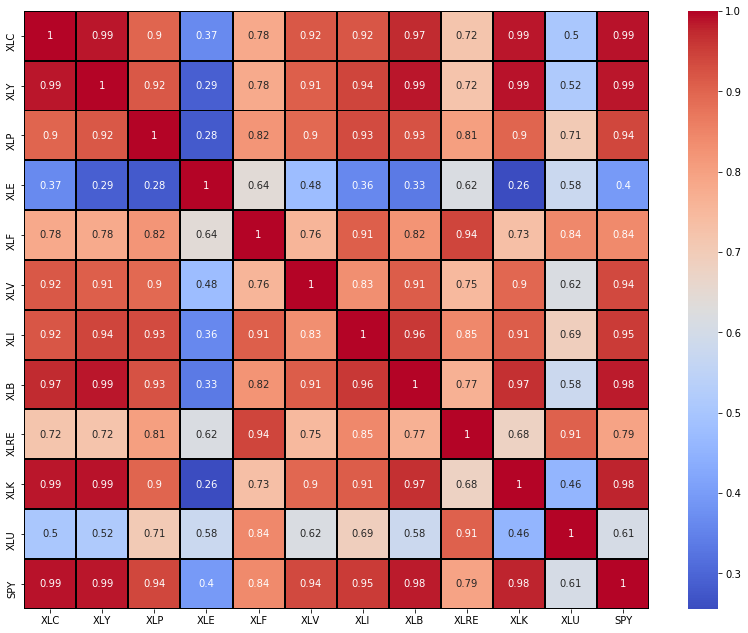

In [49]:
fig, ax = plt.subplots(figsize=(14,11))
sns.heatmap(market_comparison.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [50]:
def beta(ticker1, ticker2, window_size,df):
    covariance = df[ticker1].rolling(window=window_size).cov(df[ticker2])
    variance = df[ticker1].rolling(window=window_size).var()
    return covariance / variance

XLB_beta = beta('XLB','SPY',7,market_comparison)
XLC_beta = beta('XLC','SPY',7,market_comparison)
XLE_beta = beta('XLE','SPY',7,market_comparison)
XLF_beta = beta('XLF','SPY',7,market_comparison)
XLY_beta = beta('XLY','SPY',7,market_comparison)
XLP_beta = beta('XLP','SPY',7,market_comparison)
XLV_beta = beta('XLV','SPY',7,market_comparison)
XLI_beta = beta('XLI','SPY',7,market_comparison)
XLRE_beta = beta('XLRE','SPY',7,market_comparison)
XLK_beta = beta('XLK','SPY',7,market_comparison)
XLU_beta = beta('XLU','SPY',7,market_comparison)

In [51]:
XLB_beta.hvplot(label = "XLB") * XLC_beta.hvplot(label = "XLC") *  XLE_beta.hvplot(label = "XLE") * XLF_beta.hvplot(label = "XLF") *XLY_beta.hvplot(label = "XLY") * XLP_beta.hvplot(label = "XLP") * XLV_beta.hvplot(label = "XLV") * XLI_beta.hvplot(label = "XLI") * XLRE_beta.hvplot(label = "XLRE") * XLK_beta.hvplot(label = "XLK") * XLU_beta.hvplot(label = "XLU")

:Overlay
   .Curve.XLB  :Curve   [Date]   (0)
   .Curve.XLC  :Curve   [Date]   (0)
   .Curve.XLE  :Curve   [Date]   (0)
   .Curve.XLF  :Curve   [Date]   (0)
   .Curve.XLY  :Curve   [Date]   (0)
   .Curve.XLP  :Curve   [Date]   (0)
   .Curve.XLV  :Curve   [Date]   (0)
   .Curve.XLI  :Curve   [Date]   (0)
   .Curve.XLRE :Curve   [Date]   (0)
   .Curve.XLK  :Curve   [Date]   (0)
   .Curve.XLU  :Curve   [Date]   (0)

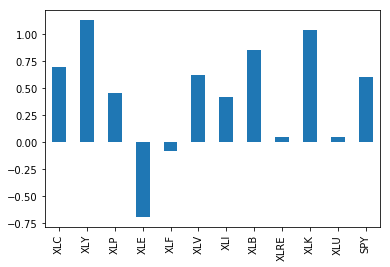

In [52]:
sharpe_ratios = (change_comparison.mean() * 252) / (change_comparison.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

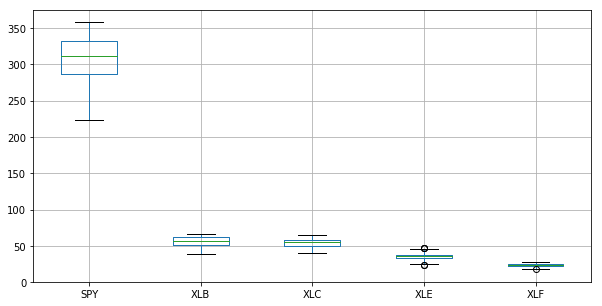

In [53]:
boxplot = market_comparison.boxplot(column=['SPY','XLB','XLC','XLE','XLF'],figsize=(10,5))

In [54]:
market_comparison.std()

XLC      6.031620
XLY     17.391173
XLP      3.580788
XLE      4.423494
XLF      1.778775
XLV      6.874101
XLI      7.337224
XLB      6.885635
XLRE     2.366047
XLK     13.556117
XLU      3.184740
SPY     29.740234
dtype: float64

In [61]:
pos_march = march_df[['deathIncrease']]
pos_march.corrwith(market_comparison, axis=0)

#positive_df.corrwith(market_comparison, axis = 0)

SPY             NaN
XLB             NaN
XLC             NaN
XLE             NaN
XLF             NaN
XLI             NaN
XLK             NaN
XLP             NaN
XLRE            NaN
XLU             NaN
XLV             NaN
XLY             NaN
deathIncrease   NaN
dtype: float64

In [ ]:
neg_march = march_df[['date','negative']]
neg_march.corrwith(market_comparison, axis=0)

#negative_df.corrwith(market_comparison, axis = 0)

In [ ]:
death_df.corrwith(market_comparison, axis = 0)

In [ ]:
hospitalized_df.corrwith(market_comparison, axis = 0)

In [ ]:
## Comparison by individual sectors with stocks and ETFs

### Materials

In [ ]:
materials_df = yf.download(['HUN','EXP','NEM','FCX','SMG','SPY','XLB'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
materials_df = materials_df['Close']
materials_df.head()

In [ ]:
materials_change = materials_df.pct_change()
materials_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(materials_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
EXP_beta = beta('EXP','SPY',7,materials_df)
FCX_beta = beta('FCX','SPY',7,materials_df)
HUN_beta = beta('HUN','SPY',7,materials_df)
NEM_beta = beta('NEM','SPY',7,materials_df)
SMG_beta = beta('SMG','SPY',7,materials_df)

In [ ]:
XLB_beta.hvplot(label = "XLB") * EXP_beta.hvplot(label = "EXP") * FCX_beta.hvplot(label = "FCX") * HUN_beta.hvplot(label = "HUN") * NEM_beta.hvplot(label = "NEM") * SMG_beta.hvplot(label = "SMG")

In [ ]:
sharpe_ratios = (materials_change.mean() * 252) / (materials_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = materials_df.boxplot(column=['HUN','EXP','NEM','FCX','SMG','SPY','XLB'],figsize=(10,5))

In [ ]:
materials_df.std()

In [ ]:
pos_march.corrwith(materials_df, axis = 0)

In [ ]:
neg_march.corrwith(materials_df, axis = 0)

In [ ]:
death_df.corrwith(materials_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(materials_df, axis = 0)

### Communications

In [ ]:
communications_df = yf.download(['VIAC','T','DISCK','FB','GOOG','SPY','XLC'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
communications_df = communications_df['Close']
communications_df.head()

In [ ]:
communications_change = communications_df.pct_change()
communications_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(communications_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
DISCK_beta = beta('DISCK','SPY',7,communications_df)
FB_beta = beta('FB','SPY',7,communications_df)
GOOG_beta = beta('GOOG','SPY',7,communications_df)
T_beta = beta('T','SPY',7,communications_df)
VIAC_beta = beta('VIAC','SPY',7,communications_df)

In [ ]:
XLC_beta.hvplot(label = "XLC") * DISCK_beta.hvplot(label = "DISCK") * FB_beta.hvplot(label = "FB") * GOOG_beta.hvplot(label = "GOOG") * T_beta.hvplot(label = "T") * VIAC_beta.hvplot(label = "VIAC")

In [ ]:
sharpe_ratios = (communications_change.mean() * 252) / (communications_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = communications_change.boxplot(column=['VIAC','T','DISCK','FB','GOOG','SPY','XLC'],figsize=(10,5))

In [ ]:
communications_change.std()

In [ ]:
positive_df.corrwith(communications_df, axis = 0)

In [ ]:
negative_df.corrwith(communications_df, axis = 0)

In [ ]:
death_df.corrwith(communications_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(communications_df, axis = 0)

### Energy

In [ ]:
energy_df = yf.download(['OKE','COP','VLO','LNG','MUR','SPY','XLE'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
energy_df = energy_df['Close']
energy_df.head()


In [ ]:
energy_change = energy_df.pct_change()
energy_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(energy_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
OKE_beta = beta('OKE','SPY',7,energy_df)
COP_beta = beta('COP','SPY',7,energy_df)
VLO_beta = beta('VLO','SPY',7,energy_df)
LNG_beta = beta('LNG','SPY',7,energy_df)
MUR_beta = beta('MUR','SPY',7,energy_df)

In [ ]:
XLC_beta.hvplot(label = "XLE") * OKE_beta.hvplot(label = "OKE") * COP_beta.hvplot(label = "COP") * VLO_beta.hvplot(label = "VLO") * LNG_beta.hvplot(label = "LNG") * MUR_beta.hvplot(label = "MUR")

In [ ]:
sharpe_ratios = (energy_change.mean() * 252) / (energy_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = energy_change.boxplot(column=['OKE','COP','VLO','LNG','MUR','SPY','XLE'],figsize=(10,5))

In [ ]:
energy_change.std()

In [ ]:
positive_df.corrwith(energy_df, axis = 0)

In [ ]:
negative_df.corrwith(energy_df, axis = 0)

In [ ]:
death_df.corrwith(energy_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(energy_df, axis = 0)

### Finance

In [ ]:
finance_df = yf.download(['BHF','UNM','MET','CFG','LFC','SPY','XLF'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
finance_df = finance_df['Close']
finance_df.head()

In [ ]:
finance_change = finance_df.pct_change()
finance_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(finance_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
BHF_beta = beta('BHF','SPY',7,finance_df)
UNM_beta = beta('UNM','SPY',7,finance_df)
MET_beta = beta('MET','SPY',7,finance_df)
CFG_beta = beta('CFG','SPY',7,finance_df)
LFC_beta = beta('LFC','SPY',7,finance_df)

In [ ]:
XLF_beta.hvplot(label = "XLF") * BHF_beta.hvplot(label = "BHF") * UNM_beta.hvplot(label = "UNM") * MET_beta.hvplot(label = "MET") * CFG_beta.hvplot(label = "CFG") * LFC_beta.hvplot(label = "LFC")

In [ ]:
sharpe_ratios = (finance_change.mean() * 252) / (finance_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = finance_change.boxplot(column=['BHF','UNM','MET','CFG','LFC','SPY','XLF'],figsize=(10,5))

In [ ]:
finance_change.std()

In [ ]:
positive_df.corrwith(finance_df, axis = 0)

In [ ]:
negative_df.corrwith(finance_df, axis = 0)

In [ ]:
death_df.corrwith(finance_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(finance_df, axis = 0)

### Industrials

In [ ]:
industrial_df = yf.download(['EAF','AL','HII','FDX','VRT','SPY','XLI'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
industrial_df = industrial_df['Close']
industrial_df.head()

In [ ]:
industrial_change = industrial_df.pct_change()
industrial_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(industrial_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
EAF_beta = beta('EAF','SPY',7,industrial_df)
AL_beta = beta('AL','SPY',7,industrial_df)
HII_beta = beta('HII','SPY',7,industrial_df)
FDX_beta = beta('FDX','SPY',7,industrial_df)
VRT_beta = beta('VRT','SPY',7,industrial_df)

In [ ]:
XLI_beta.hvplot(label = "XLI") * EAF_beta.hvplot(label = "EAF") * AL_beta.hvplot(label = "AL") * HII_beta.hvplot(label = "HII") * FDX_beta.hvplot(label = "FDX") * VRT_beta.hvplot(label = "VRT")

In [ ]:
sharpe_ratios = (industrial_change.mean() * 252) / (industrial_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = industrial_change.boxplot(column=['EAF','AL','HII','FDX','VRT','SPY','XLI'],figsize=(10,5))

In [ ]:
industrial_change.std()

In [ ]:
positive_df.corrwith(industrial_df, axis = 0)

In [ ]:
negative_df.corrwith(industrial_df, axis = 0)

In [ ]:
death_df.corrwith(industrial_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(industrial_df, axis = 0)

### Technology

In [ ]:
technology_df = yf.download(['MSFT','DELL','NLOK','XRX','NCR','SPY','XLK'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
technology_df = technology_df['Close']
technology_df.head()

In [ ]:
technology_change = technology_df.pct_change()
technology_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(technology_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
MSFT_beta = beta('MSFT','SPY',7,technology_df)
DELL_beta = beta('DELL','SPY',7,technology_df)
NLOK_beta = beta('NLOK','SPY',7,technology_df)
XRX_beta = beta('XRX','SPY',7,technology_df)
NCR_beta = beta('NCR','SPY',7,technology_df)

In [ ]:
XLK_beta.hvplot(label = "XLK") * MSFT_beta.hvplot(label = "MSFT") * DELL_beta.hvplot(label = "DELL") * NLOK_beta.hvplot(label = "NLOK") * XRX_beta.hvplot(label = "XRX") * NCR_beta.hvplot(label = "NCR")

In [ ]:
sharpe_ratios = (technology_change.mean() * 252) / (technology_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = technology_change.boxplot(column=['MSFT','DELL','NLOK','XRX','NCR','SPY','XLK'],figsize=(10,5))

In [ ]:
technology_change.std()

In [ ]:
positive_df.corrwith(technology_df, axis = 0)

In [ ]:
negative_df.corrwith(technology_df, axis = 0)

In [ ]:
death_df.corrwith(technology_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(technology_df, axis = 0)

### Consumer Staples

In [ ]:
cs_df = yf.download(['ACI','CPB','KR','PG','KO','SPY','XLP'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
cs_df = cs_df['Close']
cs_df.head()

In [ ]:
cs_change = cs_df.pct_change()
cs_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cs_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
ACI_beta = beta('ACI','SPY',7,cs_df)
CPB_beta = beta('CPB','SPY',7,cs_df)
KR_beta = beta('KR','SPY',7,cs_df)
PG_beta = beta('PG','SPY',7,cs_df)
KO_beta = beta('KO','SPY',7,cs_df)

In [ ]:
XLP_beta.hvplot(label = "XLP") * ACI_beta.hvplot(label = "ACI") * CPB_beta.hvplot(label = "CPB") * KR_beta.hvplot(label = "KR") * PG_beta.hvplot(label = "PG") * KO_beta.hvplot(label = "KO")

In [ ]:
sharpe_ratios = (cs_change.mean() * 252) / (cs_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = cs_change.boxplot(column=['ACI','CPB','KR','PG','KO','SPY','XLP'],figsize=(10,5))

In [ ]:
cs_df.std()

In [ ]:
positive_df.corrwith(cs_df, axis = 0)

In [ ]:
negative_df.corrwith(cs_df, axis = 0)

In [ ]:
death_df.corrwith(cs_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(cs_df, axis = 0)

### Health Care

In [ ]:
hc_df = yf.download(['BIIB','BIO','CVS','VRTX','ISRG','SPY','XLV'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
hc_df = hc_df['Close']
hc_df.head()

In [ ]:
hc_change = hc_df.pct_change()
hc_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(hc_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
BIIB_beta = beta('BIIB','SPY',7,hc_df)
BIO_beta = beta('BIO','SPY',7,hc_df)
CVS_beta = beta('CVS','SPY',7,hc_df)
VRTX_beta = beta('VRTX','SPY',7,hc_df)
ISRG_beta = beta('ISRG','SPY',7,hc_df)

In [ ]:
XLV_beta.hvplot(label = "XLV") * BIIB_beta.hvplot(label = "BIIB") * BIO_beta.hvplot(label = "BIO") * CVS_beta.hvplot(label = "CVS") * VRTX_beta.hvplot(label = "VRTX") * ISRG_beta.hvplot(label = "ISRG")

In [ ]:
sharpe_ratios = (hc_change.mean() * 252) / (hc_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = hc_change.boxplot(column=['BIIB','BIO','CVS','VRTX','ISRG','SPY','XLV'],figsize=(10,5))

In [ ]:
hc_df.std()

In [ ]:
positive_df.corrwith(hc_df, axis = 0)

In [ ]:
negative_df.corrwith(hc_df, axis = 0)

In [ ]:
death_df.corrwith(hc_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(hc_df, axis = 0)

### Consumer Discretionary

In [ ]:
cd_df = yf.download(['ARD','MGM','EBAY','MCD','ROST','SPY','XLY'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
cd_df = cd_df['Close']
cd_df.head()

In [ ]:
cd_change = cd_df.pct_change()
cd_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cd_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
ARD_beta = beta('ARD','SPY',7,cd_df)
MGM_beta = beta('MGM','SPY',7,cd_df)
EBAY_beta = beta('EBAY','SPY',7,cd_df)
MCD_beta = beta('MCD','SPY',7,cd_df)
ROST_beta = beta('ROST','SPY',7,cd_df)

In [ ]:
XLY_beta.hvplot(label = "XLY") * ARD_beta.hvplot(label = "ARD") * MGM_beta.hvplot(label = "MGM") * EBAY_beta.hvplot(label = "EBAY") * ROST_beta.hvplot(label = "ROST") * MCD_beta.hvplot(label = "MCD")

In [ ]:
sharpe_ratios = (cd_change.mean() * 252) / (cd_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = cd_change.boxplot(column=['ARD','MGM','EBAY','MCD','ROST','SPY','XLY'],figsize=(10,5))

In [ ]:
cd_df.std()

In [ ]:
positive_df.corrwith(cd_df, axis = 0)

In [ ]:
negative_df.corrwith(cd_df, axis = 0)

In [ ]:
death_df.corrwith(cd_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(cd_df, axis = 0)

In [ ]:
### Real Estate

In [ ]:
re_df = yf.download(['ACLD','AGNC','ADC','ALX','ARE','SPY','XLRE'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
re_df = re_df['Close']
re_df.head()

In [ ]:
re_change = re_df.pct_change()
re_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(re_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
ACLD_beta = beta('ACLD','SPY',7,re_df)
AGNC_beta = beta('AGNC','SPY',7,re_df)
ADC_beta = beta('ADC','SPY',7,re_df)
ALX_beta = beta('ALX','SPY',7,re_df)
ARE_beta = beta('ARE','SPY',7,re_df)

In [ ]:
XLRE_beta.hvplot(label = "XLRE") * ACLD_beta.hvplot(label = "ACLD") * AGNC_beta.hvplot(label = "AGNC") * ADC_beta.hvplot(label = "ADC") * ALX_beta.hvplot(label = "ALX") * ARE_beta.hvplot(label = "ARE")

In [ ]:
sharpe_ratios = (re_change.mean() * 252) / (re_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = re_change.boxplot(column=['ACLD','AGNC','ADC','ALX','ARE','SPY','XLRE'],figsize=(10,5))

In [ ]:
re_df.std()

In [ ]:
positive_df.corrwith(re_df, axis = 0)

In [ ]:
negative_df.corrwith(re_df, axis = 0)

In [ ]:
death_df.corrwith(re_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(re_df, axis = 0)

### Utilities

In [ ]:
utilities_df = yf.download(['NRG','SRE','PPL','AWK','BIP','SPY','XLU'],
                      start='2020-01-01',
                      end='2020-12-31',
                      progress=False)
utilities_df = utilities_df['Close']
utilities_df.head()

In [ ]:
utilities_change = utilities_df.pct_change()
utilities_change.plot(figsize = (18,10))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(utilities_df.corr(), annot=True, cmap='coolwarm', linewidth=1, linecolor='black')

In [ ]:
NRG_beta = beta('NRG','SPY',7,utilities_df)
SRE_beta = beta('SRE','SPY',7,utilities_df)
PPL_beta = beta('PPL','SPY',7,utilities_df)
AWK_beta = beta('AWK','SPY',7,utilities_df)
BIP_beta = beta('BIP','SPY',7,utilities_df)

In [ ]:
XLU_beta.hvplot(label = "XLU") * NRG_beta.hvplot(label = "NRG") * SRE_beta.hvplot(label = "SRE") * PPL_beta.hvplot(label = "PPL") * AWK_beta.hvplot(label = "AWK") * BIP_beta.hvplot(label = "BIP")

In [ ]:
sharpe_ratios = (utilities_change.mean() * 252) / (utilities_change.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [ ]:
boxplot = utilities_change.boxplot(column=['NRG','SRE','PPL','AWK','BIP','SPY','XLU'],figsize=(10,5))

In [ ]:
utilities_df.std()

In [ ]:
pos_march.corrwith(utilities_df, axis = 0)

In [ ]:
neg_march.corrwith(utilities_df, axis = 0)

In [ ]:
death_df.corrwith(utilities_df, axis = 0)

In [ ]:
hospitalized_df.corrwith(utilities_df, axis = 0)

In [ ]:
market_comparison[['SPY']].hvplot() + covid_df[['positive']].hvplot() + covid_df[['death']].hvplot()

In [ ]:
market_comparison[['SPY']].hvplot() + corona_df[['positiveIncrease']].hvplot() + corona_df[['deathIncrease']].hvplot()

In [ ]:
covid_df.hvplot()